<a href="https://colab.research.google.com/github/mahluwal/Tensorflow/blob/master/fraud_detection_NeuralNetwork_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv("/content/drive/My Drive/bank_dataset.csv")

In [5]:
dataset

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.000000,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712,12122,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.000000,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535,1398,1398,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241,21.228,21.228,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.000000,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947,150.6193333,150.6193333,1098.9,1098.9,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.000000,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189996,189997,0,18013I82733,234,1200,1200,5072.4,5474.34,3.0,0.0,770,1,0.0,770.0,770.0,21.00,1,0,770,770.0,21.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,UPW,7/7/2016
189997,189998,1,91352I85340,1260,82293.59,82600.7,6612.94,7250.94,3.0,0.0,8000,6,3.0,63496.0,11874.0,647.40,9,3,99171,11874.0,501.40,0.0,0.0,0,0,3,30,12.0,0.0,4.000000,36,12,0.0,1.500000,1.666667,UPW,7/29/2016
189998,189999,1,87635I84452,1457,5477,9574.42,1730.83,3614.71,7.0,0.0,1539,3,16.0,4617.0,1539.0,26.07,10,8,15390,1539.0,35.57,0.0,0.0,0,0,1,6,6.0,0.0,2738.998602,24,6,0.0,0.000000,5.000000,UPW,8/15/2016
189999,190000,0,58569I90588,555,6229.698667,6256.37,4059.07,11634.55,14.0,0.0,10000,1,0.0,10000.0,10000.0,12.00,1,0,10000,10000.0,12.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,UPW,7/22/2016


In [6]:
#some data has "UA" so deleting those rows
dataset = dataset.loc[["UA" not in i for i in dataset["aon"]]]
dataset = dataset.loc[["UA" not in i for i in dataset["daily_decr30"]]]
dataset = dataset.loc[["UA" not in i for i in dataset["daily_decr90"]]]
dataset = dataset.loc[["UA" not in i for i in dataset["rental30"]]]
dataset = dataset.loc[["UA" not in i for i in dataset["rental90"]]]

In [7]:
#Deleting the mobile number data from the dataset
dataset = dataset.drop(columns="msisdn")

In [8]:
## We have left first two columns and taken other columns as input features
X = dataset.iloc[:, 2:].values

# 2nd column is output labels
Y = dataset.iloc[:, 1].values

In [9]:
Y_oh = []
for i in Y:
  if i == 0:
    Y_oh.append([1, 0])
  if i == 1:
    Y_oh.append([0, 1])
Y_oh = np.array(Y_oh)    

In [10]:
print(Y_oh)

[[1 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [1 0]
 [0 1]]


In [11]:
X

array([['272', '3055.05', '3065.15', ..., 29.0, 'UPW', '7/20/2016'],
       ['712', '12122', '12124.75', ..., 0.0, 'UPW', '8/10/2016'],
       ['535', '1398', '1398', ..., 0.0, 'UPW', '8/19/2016'],
       ...,
       ['1457', '5477', '9574.42', ..., 5.0, 'UPW', '8/15/2016'],
       ['555', '6229.698667', '6256.37', ..., 0.0, 'UPW', '7/22/2016'],
       ['617', '13096', '13290.78', ..., 4.0, 'UPW', '7/31/2016']],
      dtype=object)

In [12]:
#Date preprocessing, removing'/' from the date and Reordering it
for i in range(len(X[:, 33])):
  a = X[i, 33].split('/')
  if len(a[0]) == 1:
    a[0] = '0' + a[0]
  if len(a[1]) == 1:
    a[1] = '0' + a[1]
  X[i, 33] = '/'.join(a)
  X[i, 33] = X[i, 33].replace('/', '')[4:]+ X[i, 33].replace('/', '')[:4]

In [13]:
#visualise the date
X[:, 33]

array(['20160720', '20160810', '20160819', ..., '20160815', '20160722',
       '20160731'], dtype=object)

In [14]:
#visualising input data 
X

array([['272', '3055.05', '3065.15', ..., 29.0, 'UPW', '20160720'],
       ['712', '12122', '12124.75', ..., 0.0, 'UPW', '20160810'],
       ['535', '1398', '1398', ..., 0.0, 'UPW', '20160819'],
       ...,
       ['1457', '5477', '9574.42', ..., 5.0, 'UPW', '20160815'],
       ['555', '6229.698667', '6256.37', ..., 0.0, 'UPW', '20160722'],
       ['617', '13096', '13290.78', ..., 4.0, 'UPW', '20160731']],
      dtype=object)

In [15]:
#incoading pcircle in the data because it in str form
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 32] = labelencoder.fit_transform(X[:, 32])

In [16]:
X[:, 32]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [17]:
#data type of each column
for i in range(33):
  print(type(X[3, i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>


In [18]:
#first five columns and 33rd column is string so they cant be normalized
#converting them to float
t = [0,1,2,3,4,33]
for i in t:
  X[:, i] = X[:, i].astype('float64')

In [19]:
#data type of each column
for i in range(33):
  print(type(X[3, i]))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>


In [20]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_oh, test_size = 0.15, random_state = 0)

In [21]:
#visualizing test train data
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(X_test))

156877
27685
156877
27685


In [22]:
#visualizing test train data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(156877, 34)
(27685, 34)
(156877, 2)
(27685, 2)


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
print(np.mean(X_train[:, 30]))
print(np.std(X_train[:, 30]))

3.728065464052337e-15
0.9999999999999285


In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(520, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, batch_size=100, verbose=1)  
history_dict = history.history
print(model.summary())


Epoch 1/15
1569/1569 [==============================] - 26s 3ms/step - loss: 0.4285 - accuracy: 0.8175 - val_loss: 0.3277 - val_accuracy: 0.8756
Epoch 2/15
1569/1569 [==============================] - 5s 3ms/step - loss: 0.3233 - accuracy: 0.8744 - val_loss: 0.3049 - val_accuracy: 0.8756
Epoch 3/15
1569/1569 [==============================] - 5s 3ms/step - loss: 0.3010 - accuracy: 0.8763 - val_loss: 0.2938 - val_accuracy: 0.8756
Epoch 4/15
1569/1569 [==============================] - 5s 3ms/step - loss: 0.2914 - accuracy: 0.8756 - val_loss: 0.2863 - val_accuracy: 0.8759
Epoch 5/15
1569/1569 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.8768 - val_loss: 0.2803 - val_accuracy: 0.8783
Epoch 6/15
1569/1569 [==============================] - 5s 3ms/step - loss: 0.2786 - accuracy: 0.8802 - val_loss: 0.2754 - val_accuracy: 0.8838
Epoch 7/15
1569/1569 [==============================] - 4s 3ms/step - loss: 0.2748 - accuracy: 0.8839 - val_loss: 0.2715 - val_accuracy

In [26]:
520*64  +64

33344

In [27]:
scores =  model.evaluate(X_test, Y_test, verbose=0)
Accuracy=scores[1]*100
print('Accuracy of your model is')
print(scores[1]*100)

Accuracy of your model is
89.04099464416504


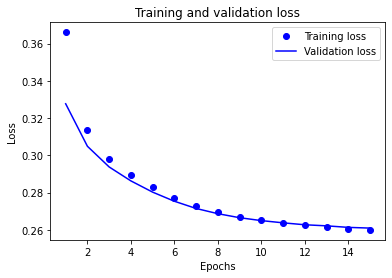

In [28]:
import matplotlib.pyplot as plt
plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
history_dict

{'accuracy': [0.8647921681404114,
  0.8759920001029968,
  0.8759920001029968,
  0.8759920001029968,
  0.8772477507591248,
  0.8809767961502075,
  0.885075569152832,
  0.8868349194526672,
  0.8873767256736755,
  0.8877528309822083,
  0.8884859085083008,
  0.8885942697525024,
  0.888759970664978,
  0.8889576196670532,
  0.8891997933387756],
 'loss': [0.36607828736305237,
  0.31377360224723816,
  0.2983105778694153,
  0.28940349817276,
  0.28279832005500793,
  0.2773798406124115,
  0.2729671001434326,
  0.2695634067058563,
  0.26703664660453796,
  0.2650980055332184,
  0.26360103487968445,
  0.2624583840370178,
  0.261494517326355,
  0.26067379117012024,
  0.2599964737892151],
 'val_accuracy': [0.8756005167961121,
  0.8756005167961121,
  0.8756005167961121,
  0.875925600528717,
  0.8782734274864197,
  0.8837999105453491,
  0.886075496673584,
  0.8866895437240601,
  0.8868340253829956,
  0.8887845277786255,
  0.8887484073638916,
  0.8884594440460205,
  0.8890734910964966,
  0.8888567686080

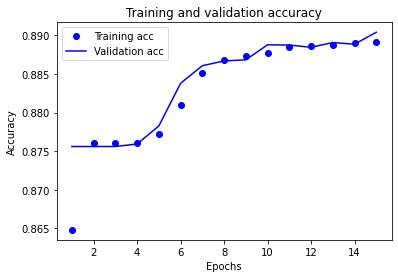

In [30]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
pred_vec = model.predict(X_test)

In [32]:
pred_vec

array([[2.57741340e-04, 9.99742210e-01],
       [4.92235180e-03, 9.95077670e-01],
       [2.16494111e-04, 9.99783576e-01],
       ...,
       [1.09568646e-04, 9.99890447e-01],
       [2.40162690e-03, 9.97598350e-01],
       [3.36981505e-01, 6.63018465e-01]], dtype=float32)

In [33]:
pred = []
for vec in pred_vec:
  pred.append(np.argmax(vec))

In [34]:
pred

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
